In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [91]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

## Perform API Calls

In [92]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Initialize pandas data frame with cities array
cities_df = pd.DataFrame(columns=['City','ID','Lat','Long','Temp','Humidity','Cloudiness','Wind Speed'])
cities_df['City'] = cities

# Build cities data frame
for index,row in cities_df.iterrows():
    
    # Add city to url
    url = base_url + "&q=" + row['City']
    
    # API response  
    try:
        response = requests.get(url).json()
        cities_df.loc[index,'ID'] = response['id'] 
        cities_df.loc[index,'Lat'] = response['coord']['lat'] 
        cities_df.loc[index,'Long'] = response['coord']['lon'] 
        cities_df.loc[index,'Temp'] = response['main']['temp_max'] 
        cities_df.loc[index,'Humidity'] = response['main']['humidity'] 
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all'] 
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        # Print log
        print(f"Name {row['City']}, ID {response['id']}")
    except:
       print(f"{row['City']} not found.")
             
# Save city data to csv
cities_df.to_csv("global_weather_data.csv")
              

Name verkhnyaya inta, ID 1487332
Name rikitea, ID 4030556
Name tabou, ID 2281120
Name butaritari, ID 2110227
Name ushuaia, ID 3833367
Name mahebourg, ID 934322
nizhneyansk not found.
Name tubmanburg, ID 2273435
Name alepe, ID 2293045
Name taoudenni, ID 2450173
Name saint-philippe, ID 6138908
Name bluff, ID 2175403
Name bambanglipuro, ID 1650434
Name punta arenas, ID 3874787
Name hermanus, ID 3366880
grand river south east not found.
Name chernyshevskiy, ID 2025456
Name husavik, ID 5961417
Name valle de allende, ID 3980627
Name burns lake, ID 5911745
Name avarua, ID 4035715
Name hami, ID 1529484
Name bollnas, ID 2720679
Name saskylakh, ID 2017155
Name krasnogorskiy, ID 1498389
Name victoria, ID 1733782
Name ponta do sol, ID 3453439
Name scottsbluff, ID 5699404
Name chuy, ID 3443061
Name kudahuvadhoo, ID 1337607
Name atuona, ID 4020109
Name clyde river, ID 5924351
Name kaitangata, ID 2208248
kamenskoye not found.
mys shmidta not found.
Name faya, ID 110690
Name vestmannaeyjar, ID 3412093

In [58]:
cities_df.head()

,City,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
0,calvinia,-31.47,19.78,41.68,56,0,4.72
1,dikson,73.51,80.55,50.59,80,88,15.23
2,rogatica,43.8,19,68.9,77,20,2.24
3,kaputa,-8.47,29.66,67.87,64,0,1.48
4,jamestown,-33.21,138.6,36.1,58,0,8.3


In [85]:
# Convert columns to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Long'] = pd.to_numeric(cities_df['Long'])
cities_df['Temp'] = pd.to_numeric(cities_df['Temp'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

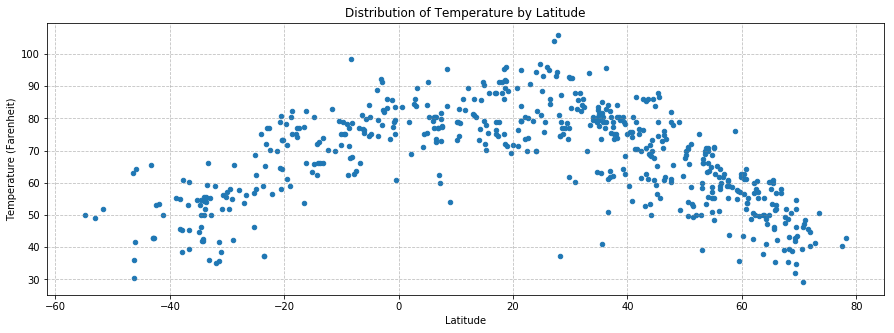

In [82]:
# Plot Temperature 
cities_df.plot(kind='scatter',x='Lat',y='Temp',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.title("Distribution of Temperature by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Temp Distribution.png")

# Show plot
plt.show()


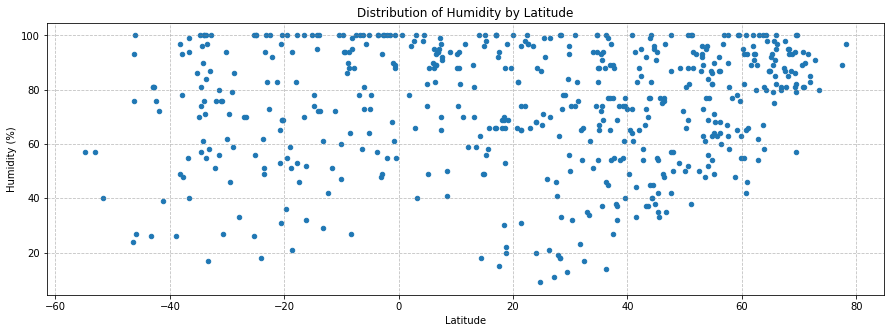

In [87]:
# Plot Humidity
cities_df.plot(kind='scatter',x='Lat',y='Humidity',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Distribution of Humidity by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Humidity Distribution.png")

# Show plot
plt.show()

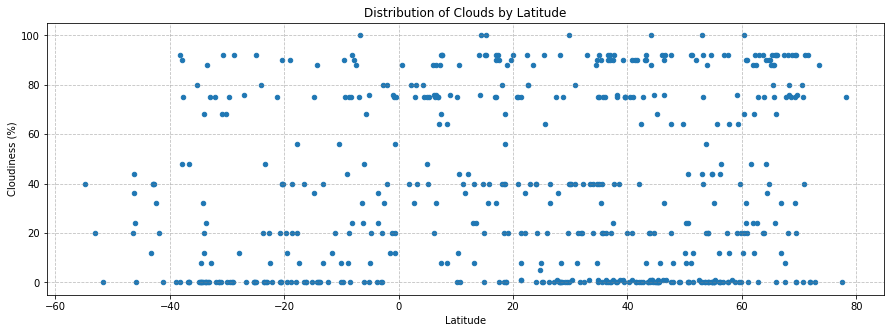

In [88]:
# Plot Cloudiness
cities_df.plot(kind='scatter',x='Lat',y='Cloudiness',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Distribution of Clouds by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Cloudiness Distribution.png")

# Show plot
plt.show()

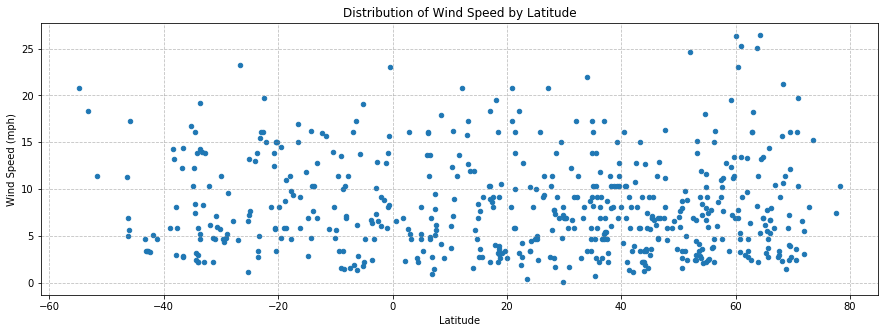

In [89]:
# Plot Wind Speed
cities_df.plot(kind='scatter',x='Lat',y='Wind Speed',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Distribution of Wind Speed by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Wind Speed Distribution.png")

# Show plot
plt.show()